In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials,SpotifyOAuth
import sys
import os
from IPython.core.interactiveshell import InteractiveShell
import time

In [2]:
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_columns",500)
pd.set_option("display.min_rows",500)

In [3]:
os.chdir(os.path.join(os.path.expanduser("~"),"Desktop"))
import auth

In [77]:
my_color = {"light_blue":"#7FB3D5"}

In [4]:
sp = spotipy.Spotify(client_credentials_manager= SpotifyClientCredentials(client_id = auth.client_id, client_secret = auth.client_secret),
auth_manager = SpotifyOAuth(client_id = auth.client_id, client_secret = auth.client_secret,redirect_uri = auth.redirect_url))

In [5]:
#sp.current_user_playing_track()["item"]["uri"]

In [7]:
#sp.current_user_playing_track()["item"]["album"]["uri"]

In [8]:
#Define a finction to create the feature for a specfic artists(album features,track_features,audio_features) Album not 单曲
def create_feature(artist,type_al = "album",limit = 50,offset = 0):
    album_list = []
    albums = sp.search(q = "artist:"+artist,limit = limit,offset = offset,type = "album")
    count = 0
    min_time,max_time = 2,5
    start_time = time.time()
    for i in range(len(albums["albums"]["items"])):
        if albums["albums"]["items"][i]["type"] == type_al:
            count += 1
            album0 = {}
            album0["artist_name"] = albums["albums"]["items"][i]["artists"][0]["name"]
            album0["artist_uri"] = albums["albums"]["items"][i]["artists"][0]["uri"]
            album0["album_name"] = albums["albums"]["items"][i]["name"]
            album0["album_uri"] = albums["albums"]["items"][i]["uri"]
            album0["album_market"] = ",".join(albums["albums"]["items"][i]["available_markets"])
            album0["album_release_date"] = albums["albums"]["items"][i]["release_date"]
            album0["total_tracks"]  = albums["albums"]["items"][i]["total_tracks"]
            album0["album_type"] = albums["albums"]["items"][i]["type"]
            #Create empty features
            album0["track_name"] = []
            album0["track_uri"] = []
            album0["track_number"]  = []
            album0["duration_ms"] = []
            album0["track_market"] = []
            album0["popularity"] = []
            album0["track_type"] = []
            album0["danceability"] = []
            album0["energy"] = []
            album0["key"] = []
            album0["loudness"] = []
            album0["mode"] = []
            album0["speechiness"] = []
            album0["acousticness"] = []
            album0["instrumentalness"] = []
            album0["liveness"] = []
            album0["valence"] = []
            album0["tempo"] = []
            album0["time_signature"] = []
            tracks = sp.album(album0["album_uri"])
            #50 tracks at maximum
            if album0["total_tracks"] > 50:
                tracks_add = sp.album_tracks(album0["album_uri"],offset = 50)
                add_len = len(tracks_add["items"])
            else:
                add_len = 0
            for j in range(len(tracks["tracks"]["items"])):
                album0["track_name"].append(tracks["tracks"]["items"][j]["name"])
                album0["track_uri"] .append(tracks["tracks"]["items"][j]["uri"])
             #dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
                album0["track_number"].append(tracks["tracks"]["items"][j]["track_number"])
                album0["track_type"].append(tracks["tracks"]["items"][j]["type"])
                album0["duration_ms"].append(tracks["tracks"]["items"][j]["duration_ms"])
                album0["track_market"].append(",".join(tracks["tracks"]["items"][j]["available_markets"]))
                track_feature = sp.track(tracks["tracks"]["items"][j]["uri"])
                album0["popularity"].append(track_feature["popularity"])
                features = sp.audio_features(tracks["tracks"]["items"][j]["uri"])
                album0["danceability"].append(features[0]["danceability"])
                album0["energy"].append(features[0]["energy"])
                album0["key"].append(features[0]["key"])
                album0["loudness"].append(features[0]["loudness"])
                album0["mode"].append(features[0]["mode"])
                album0["speechiness"].append(features[0]["speechiness"])
                album0["acousticness"].append(features[0]["acousticness"])
                album0["instrumentalness"].append(features[0]["instrumentalness"])
                album0["liveness"].append(features[0]["liveness"])
                album0["valence"].append(features[0]["valence"])
                album0["tempo"].append(features[0]["tempo"])
                album0["time_signature"].append(features[0]["time_signature"])
            if add_len!=0:
                for j in range(len(tracks_add["items"])):
                    album0["track_name"].append(tracks_add["items"][j]["name"])
                    album0["track_uri"] .append(tracks_add["items"][j]["uri"])
                    album0["track_number"].append(tracks_add["items"][j]["track_number"])
                    album0["track_type"].append(tracks_add["items"][j]["type"])
                    album0["duration_ms"].append(tracks_add["items"][j]["duration_ms"])
                    album0["track_market"].append(",".join(tracks_add["items"][j]["available_markets"]))
                    track_feature = sp.track(tracks_add["items"][j]["uri"])
                    features = sp.audio_features(tracks_add["items"][j]["uri"])
                    album0["popularity"].append(track_feature["popularity"])
                    album0["danceability"].append(features[0]["danceability"])
                    album0["energy"].append(features[0]["energy"])
                    album0["key"].append(features[0]["key"])
                    album0["loudness"].append(features[0]["loudness"])
                    album0["mode"].append(features[0]["mode"])
                    album0["speechiness"].append(features[0]["speechiness"])
                    album0["acousticness"].append(features[0]["acousticness"])
                    album0["instrumentalness"].append(features[0]["instrumentalness"])
                    album0["liveness"].append(features[0]["liveness"])
                    album0["valence"].append(features[0]["valence"])
                    album0["tempo"].append(features[0]["tempo"])
                    album0["time_signature"].append(features[0]["time_signature"])





        album0_df = pd.DataFrame.from_dict(album0)
        if count%5 == 0:
            print("%d playlists finished!" %count)
            time.sleep(np.random.uniform(min_time,max_time))
            elapsed_time = time.time()-start_time
            print("Elapsed time: {}".format(elapsed_time))
        album_list.append(album0_df)
    return pd.concat(album_list)


In [9]:
#Sodagreen
sample = create_feature(artist = "Sodagreen")

5 playlists finished!
Elapsed time: 12.128457069396973
10 playlists finished!
Elapsed time: 22.85018229484558
15 playlists finished!
Elapsed time: 30.170788049697876
20 playlists finished!
Elapsed time: 35.8156054019928
25 playlists finished!
Elapsed time: 40.47488188743591


In [10]:
sample.groupby("album_name").size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,count
25,陪我歌唱 (Live),16
19,秋:故事,16
6,十年一刻,14
8,夏 / 狂熱,14
23,蘇打綠故事未了音樂電影 (Endless Story Live),13


In [11]:
assert(sample.groupby("album_name").size().reset_index(name = "count").sort_values("album_name")["count"].tolist() == sample[["album_name","total_tracks"]].drop_duplicates().sort_values("album_name")["total_tracks"].tolist())

In [12]:
#Jay chou
sample2 = create_feature(artist = "Jay Chou")

5 playlists finished!
Elapsed time: 9.753827810287476
10 playlists finished!
Elapsed time: 17.313465118408203
15 playlists finished!
Elapsed time: 28.642975568771362
20 playlists finished!
Elapsed time: 38.75088620185852
25 playlists finished!
Elapsed time: 53.010863065719604
30 playlists finished!
Elapsed time: 66.51557350158691
35 playlists finished!
Elapsed time: 70.36204361915588
40 playlists finished!
Elapsed time: 73.58524584770203


In [13]:
sample2.groupby("album_name").size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,count
15,周杰倫地表最強世界巡迴演唱會,25
13,周杰倫2004無與倫比演唱會,25
34,超時代演唱會,24
18,周杰倫魔天倫世界巡迴演唱會 (Live),22
14,周杰倫2007世界巡迴演唱會,21


In [14]:
assert(sample2.groupby("album_name").size().reset_index(name = "count").sort_values("album_name")["count"].tolist() == sample2[["album_name","total_tracks"]].drop_duplicates().sort_values("album_name")["total_tracks"].tolist())

In [15]:
#Coldplay
sample3 = create_feature(artist = "Coldplay")

5 playlists finished!
Elapsed time: 13.774516820907593
10 playlists finished!
Elapsed time: 31.065698623657227
15 playlists finished!
Elapsed time: 38.09103345870972
20 playlists finished!
Elapsed time: 44.4719774723053
25 playlists finished!
Elapsed time: 51.606157541275024
30 playlists finished!
Elapsed time: 55.51012873649597
35 playlists finished!
Elapsed time: 61.11111545562744
40 playlists finished!
Elapsed time: 66.46403789520264
45 playlists finished!
Elapsed time: 71.9176094532013
50 playlists finished!
Elapsed time: 76.08220028877258


In [16]:
sample3_2 = create_feature(artist = "Coldplay", offset = 50) #There are additional ablbums for Coldplay

5 playlists finished!
Elapsed time: 5.108118772506714
10 playlists finished!
Elapsed time: 10.016207933425903


In [17]:
sample3.groupby("album_name").size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,count
12,Everyday Life,32
24,Live in Buenos Aires,24
43,Viva La Vida (Prospekt's March Edition),18
22,Live 2012,15
26,Mylo Xyloto,14


In [18]:
sample3_2.groupby("album_name").size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,count
5,Karaoke Elite Vol.1,15
2,Clocks,4
10,Talk,3
3,God Put a Smile upon Your Face,2
11,The Hardest Part,2


In [26]:
sample4 = create_feature(artist  = "Joey Yung")

5 playlists finished!
Elapsed time: 33.172703981399536
10 playlists finished!
Elapsed time: 53.511569023132324
15 playlists finished!
Elapsed time: 71.9465582370758
20 playlists finished!
Elapsed time: 97.4902753829956
25 playlists finished!
Elapsed time: 102.952223777771
30 playlists finished!
Elapsed time: 111.19727182388306
35 playlists finished!
Elapsed time: 120.08070826530457
40 playlists finished!
Elapsed time: 125.2850558757782
45 playlists finished!
Elapsed time: 132.09385228157043
50 playlists finished!
Elapsed time: 147.44446420669556


In [20]:
sample4_2 = create_feature(artist  = "Joey Yung", offset = 50) #There are 45 additional albums for Joey Yung! Let's join them together

5 playlists finished!
Elapsed time: 19.951181173324585
10 playlists finished!
Elapsed time: 29.86154866218567
15 playlists finished!
Elapsed time: 37.01825714111328
20 playlists finished!
Elapsed time: 45.92427182197571
25 playlists finished!
Elapsed time: 61.79650402069092
30 playlists finished!
Elapsed time: 67.54688715934753
35 playlists finished!
Elapsed time: 73.82416343688965
40 playlists finished!
Elapsed time: 80.81531167030334
45 playlists finished!
Elapsed time: 88.78849530220032


In [27]:
sample4.groupby("album_name").size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,count
11,Joey Yung X Hacken Lee Concert 2015 (Live),55
12,Joey • My Secret • Live,41
0,1314 容祖兒演唱會,39
7,Hopelessly Romantic Collection,35
2,All Delicious Collection,34


In [28]:
sample4_2.groupby("album_name").size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,count
28,容祖兒 姚珏 莫拉維亞交響樂團音樂會,30
9,Perfect 10 Live 2009,28
10,Reflection of Joey's Live 2005,28
4,Joey & Joey 新城容祖兒音樂會,27
34,新城唱好 容祖兒 黃耀明 祖戀明歌音樂會,24


In [29]:
assert(sample4.groupby("album_name").size().reset_index(name = "count").sort_values("album_name")["count"].tolist() == sample4[["album_name","total_tracks"]].drop_duplicates().sort_values("album_name")["total_tracks"].tolist())
assert(sample4_2.groupby("album_name").size().reset_index(name = "count").sort_values("album_name")["count"].tolist() == sample4_2[["album_name","total_tracks"]].drop_duplicates().sort_values("album_name")["total_tracks"].tolist())

In [30]:
#Join sample4 and sample4_2
sample4_all = pd.concat([sample4,sample4_2])
sample3_all = pd.concat([sample3,sample3_2])

In [31]:
os.chdir(".\Learning")

In [32]:
sample.to_csv("sodagreen.csv",index = False)

In [33]:
sample2.to_csv("jay.csv",index = False)

In [34]:
sample3_all.to_csv("coldplay.csv",index = False)

In [35]:
sample4_all.to_csv("yung.csv",index = False)

In [36]:
#Load the saved data
sodagreen = pd.read_csv("sodagreen.csv")
jay = pd.read_csv("jay.csv")
coldplay = pd.read_csv("coldplay.csv")
yung = pd.read_csv("yung.csv")

In [59]:
sodagreen["album_release_date"] = pd.to_datetime(sodagreen["album_release_date"], format = "%Y-%m-%d")
jay["album_release_date"] = pd.to_datetime(jay["album_release_date"],format = "%Y-%m-%d")
coldplay["album_release_date"] = pd.to_datetime(coldplay["album_release_date"], format = "%Y-%m-%d")

In [61]:
sodagreen["year"]  = sodagreen["album_release_date"].dt.year
sodagreen["month"] = sodagreen["album_release_date"].dt.month
sodagreen["day"] = sodagreen["album_release_date"].dt.day
jay["year"] = jay["album_release_date"].dt.year
jay["month"] = jay["album_release_date"].dt.month
jay["day"] = jay["album_release_date"].dt.day
coldplay["year"] = coldplay["album_release_date"].dt.year
coldplay["month"] = coldplay["album_release_date"].dt.month
coldplay["day"] = coldplay["album_release_date"].dt.day

In [37]:
print("The total number of albums for Sodagreen is: {:d}".format(len(sodagreen["album_name"].unique().tolist())))
print("The total number of albums for Jay Chou is: {:d}".format(len(jay["album_name"].unique().tolist())))
print("The total number of albums for Coldplay is: {:d}".format(len(coldplay["album_name"].unique().tolist())))
print("The total number of albums for Joey Yung is: {:d}".format(len(yung["album_name"].unique().tolist())))

The total number of albums for Sodagreen is: 27
The total number of albums for Jay Chou is: 42
The total number of albums for Coldplay is: 56
The total number of albums for Joey Yung is: 99


In [38]:
sodagreen.columns

Index(['artist_name', 'artist_uri', 'album_name', 'album_uri', 'album_market',
       'album_release_date', 'total_tracks', 'album_type', 'track_name',
       'track_uri', 'track_number', 'duration_ms', 'track_market',
       'popularity', 'track_type', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [39]:
print("The first album from Sodagreen is released on {:>10} and the lastest album is released on {:>10}".format(str(sodagreen.loc[sodagreen["album_release_date"] == sodagreen["album_release_date"].min(),"album_release_date"].unique()[0]),str(sodagreen.loc[sodagreen["album_release_date"] == sodagreen["album_release_date"].max(),"album_release_date"].unique()[0])))
print("The first album from Jay Chou is released on {:>10} and the lastest album is released on {:>10}".format(str(jay.loc[jay["album_release_date"] == jay["album_release_date"].min(),"album_release_date"].unique()[0]),str(jay.loc[jay["album_release_date"] == jay["album_release_date"].max(),"album_release_date"].unique()[0])))
print("The first album from Coldplay is released on {:>10} and the lastest album is released on {:>10}".format(str(coldplay.loc[coldplay["album_release_date"] == coldplay["album_release_date"].min(),"album_release_date"].unique()[0]),str(coldplay.loc[coldplay["album_release_date"] == coldplay["album_release_date"].max(),"album_release_date"].unique()[0])))

The first album from Sodagreen is released on 2004-05-30 and the lastest album is released on 2016-12-30
The first album from Jay Chou is released on 2000-11-06 and the lastest album is released on 2020-06-12
The first album from Coldplay is released on 1999-04-26 and the lastest album is released on 2020-03-16


In [40]:
print(sodagreen.loc[sodagreen["album_release_date"] == sodagreen["album_release_date"].max(),"album_name"].unique()[0])
print(jay.loc[jay["album_release_date"] == jay["album_release_date"].max(),"album_name"].unique()[0]) #Mojito seems like a single, not an album
print(coldplay.loc[coldplay["album_release_date"] == coldplay["album_release_date"].max(),"album_name"].unique()[0])


蘇打綠故事未了音樂電影 (Endless Story Live)
Mojito
Champion Of The World (Live at NPR's Tiny Desk)


In [41]:
#Let's extract the Mojito
jay[jay["album_name"] == "Mojito"]

,artist_name,artist_uri,album_name,album_uri,album_market,album_release_date,total_tracks,album_type,track_name,track_uri,track_number,duration_ms,track_market,popularity,track_type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
84,Jay Chou,spotify:artist:2elBjNSdBE2Y3f0j1mjrql,Mojito,spotify:album:6pIXXqOGDkatrb00Oblrgo,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2020-06-12,1,album,Mojito,spotify:track:7BYMjh3vWnHU4IFyfZdIDO,1,185008,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",64,track,0.814,0.595,0,-7.726,1,0.0277,0.476,0.0,0.278,0.8,115.004,4


In [48]:
sodagreen["duration_min"] = sodagreen["duration_ms"]/(1000*60)
jay["duration_min"] = jay["duration_ms"]/(1000*60)
coldplay["duration_min"] = coldplay["duration_ms"]/(1000*60)

In [ ]:
features = ["total_tracks","track_number","duration_min","popularity","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"]

In [70]:
sodagreen_album = sodagreen[["album_name","album_market","album_release_date","total_tracks","year","month", "day","artist_name"]].drop_duplicates()
jay_album = jay[["album_name","album_market","album_release_date","total_tracks","year","month","day","artist_name"]].drop_duplicates()
coldplay_album = coldplay[["album_name","album_market","album_release_date","total_tracks","year","month","day","artist_name"]].drop_duplicates()


In [89]:
def plot_0(data):
    name = data["artist_name"].unique().tolist()[0]
    fig, axes = plt.subplots(nrows = 2,figsize = (10,8))
    fig.suptitle(name)
    axes[0].hist(data["year"], color = my_color["light_blue"], bins = 12)
    axes[0].set_xlabel("year")
    axes[1].hist(data["month"],color = my_color["light_blue"],bins = 12)
    axes[1].set_xlabel("month")
    plt.show()

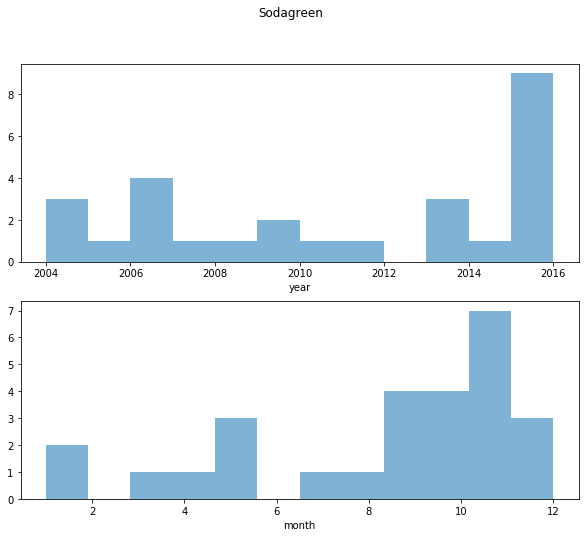

In [90]:
plot_0(sodagreen_album)


In [91]:
#Sodagreen usually release the albums after August. The release peak occurs between 2014 and 2016.

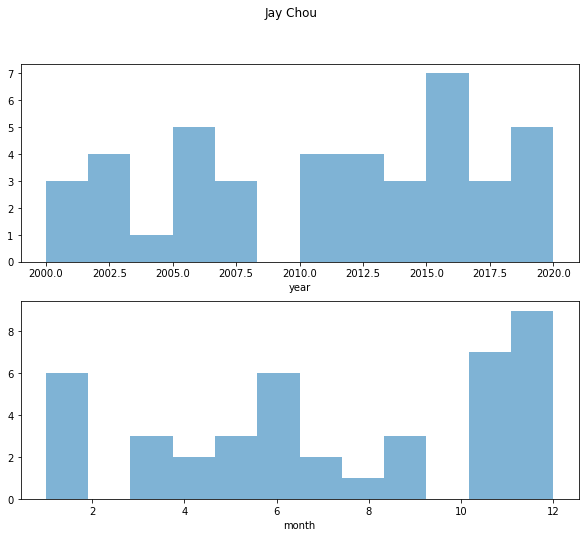

In [92]:
plot_0(jay_album)

In [93]:
#jay chou usually relase his albums between November to December, which is at the end of year

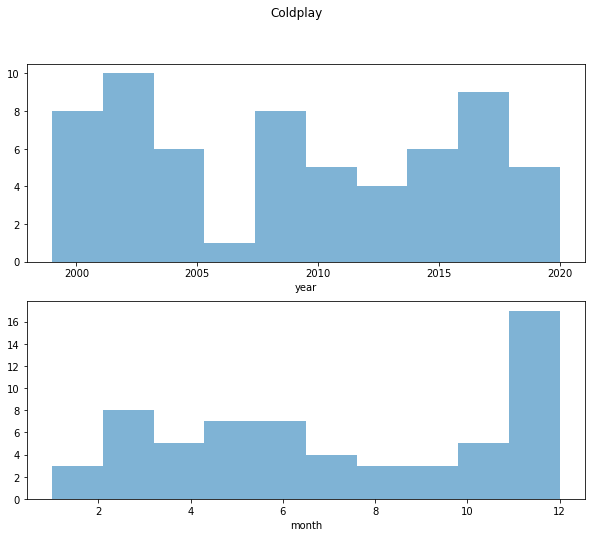

In [83]:
plot_0(coldplay_album)

In [ ]:
#Create a function to display the histgram plot for the album
def viz(data):
    plt_name = data["artist_name"].unique().tolist()[0]
    